In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from NeuralNetwork.led import LED
from utilities.params import NNParams

import tensorflow as tf
tfk = tf.keras
tfkl = tfk.layers

In [2]:
latent_dim = 40
data_dir_test = '../../dataset/test_set.npz'
autoencoder_dir = '../../models/autoencoder1'

test = np.load(data_dir_test)['test_data']
print(np.shape(test))

(100, 1001, 20, 20, 2)


In [3]:

network = LED(latent_dim=latent_dim)
X_predicted, error = network.test_autoencoder(autoencoder_dir=autoencoder_dir,data_dir_test=data_dir_test,compressed_name_test='test_data')


1/1 [==============================] - 0s 29ms/step


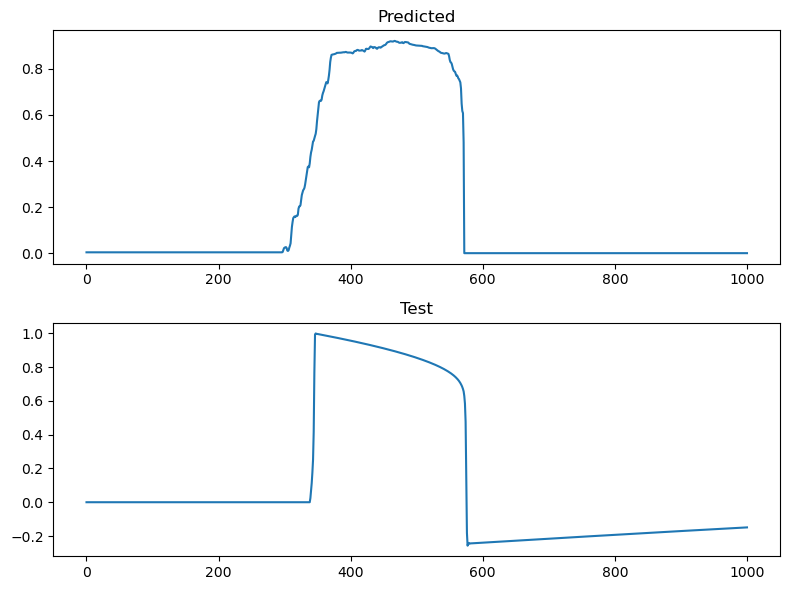

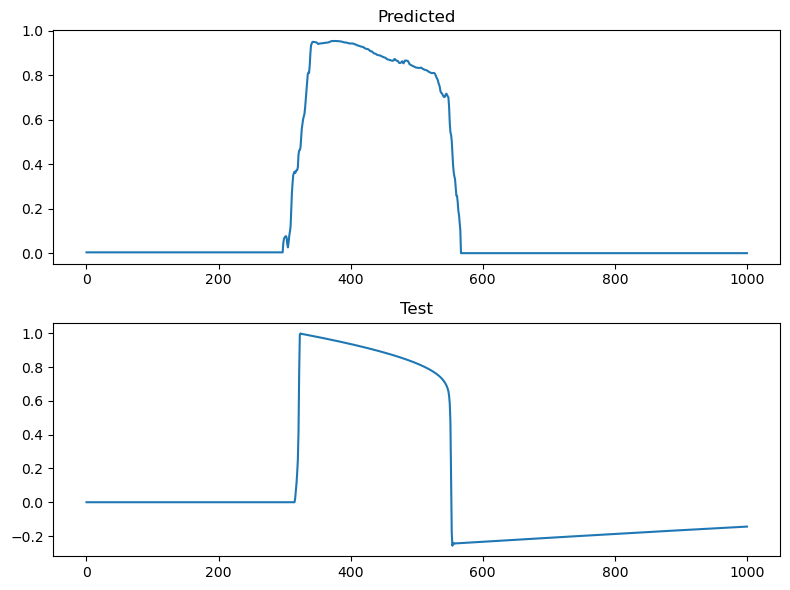

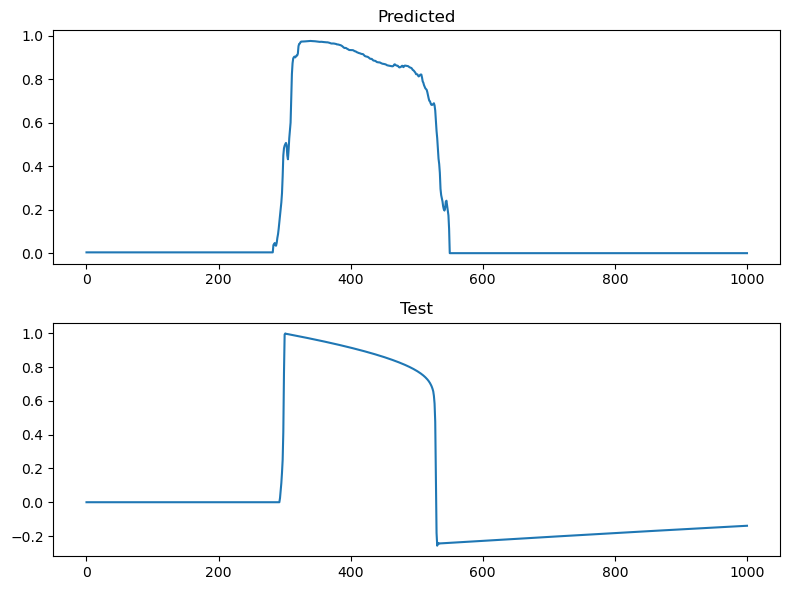

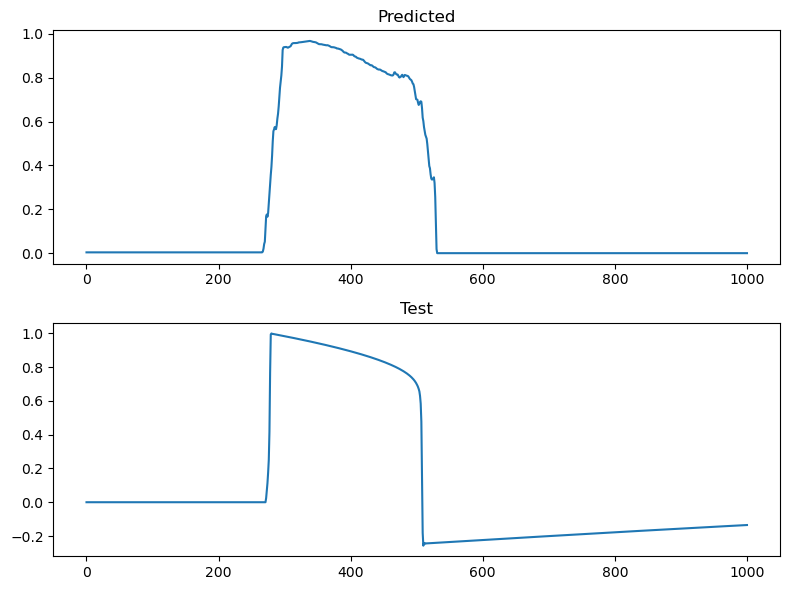

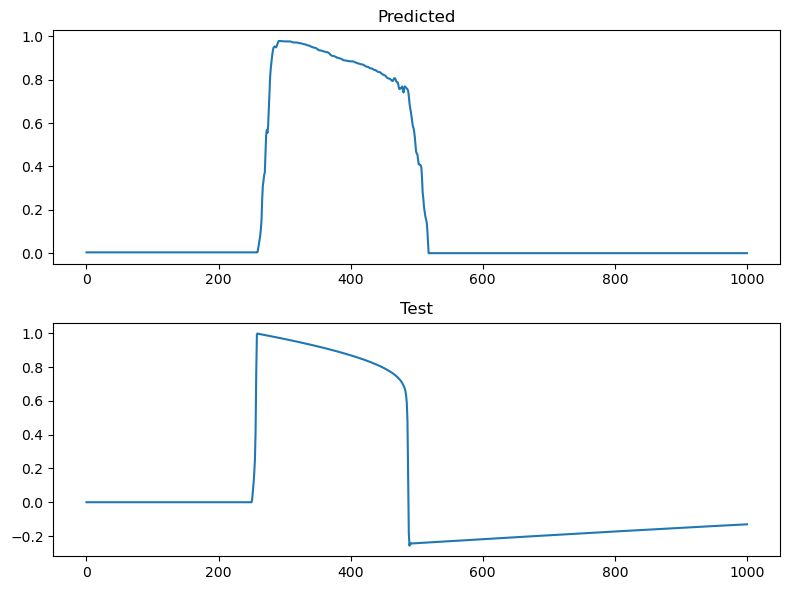

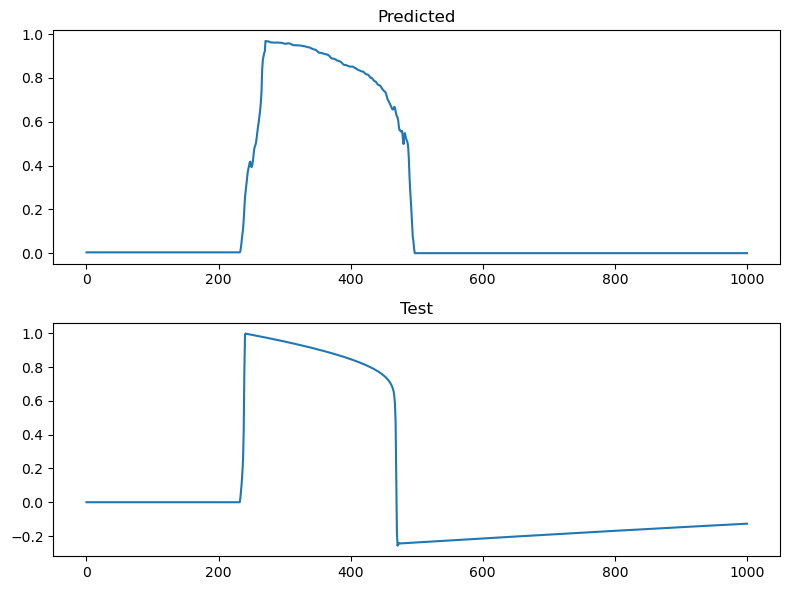

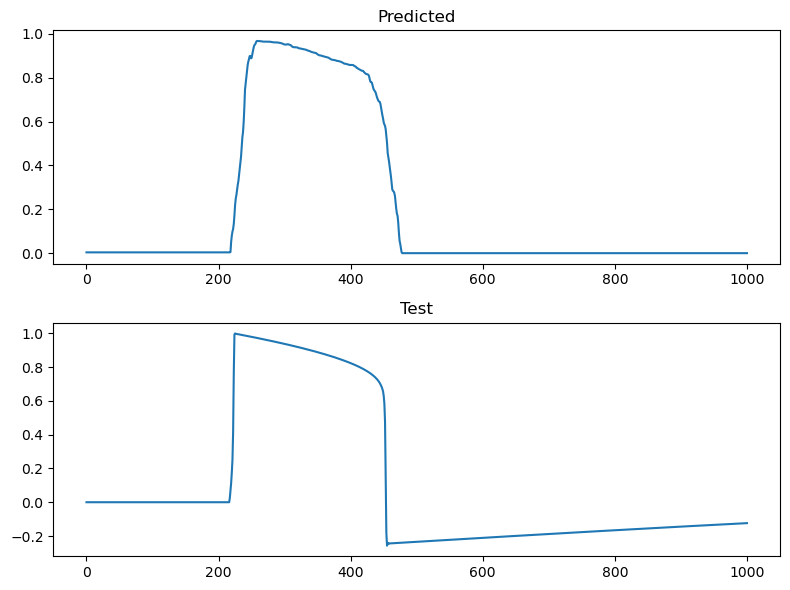

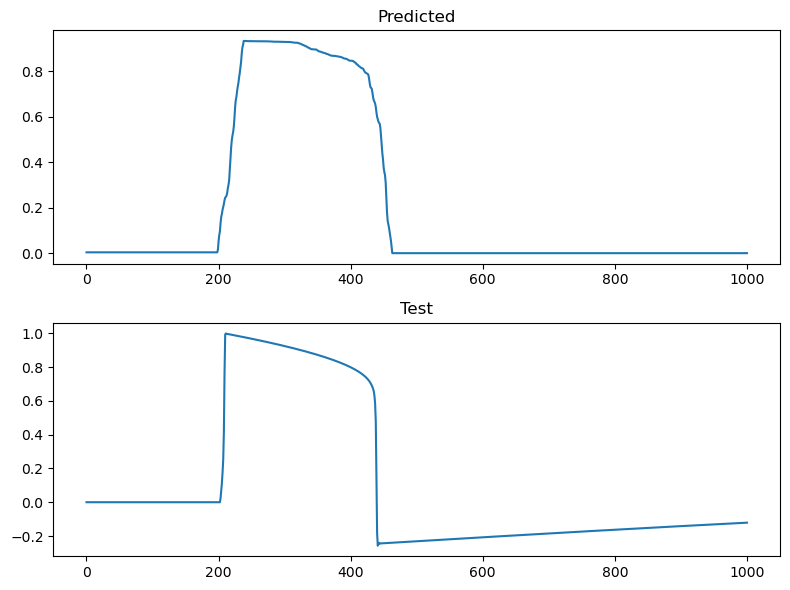

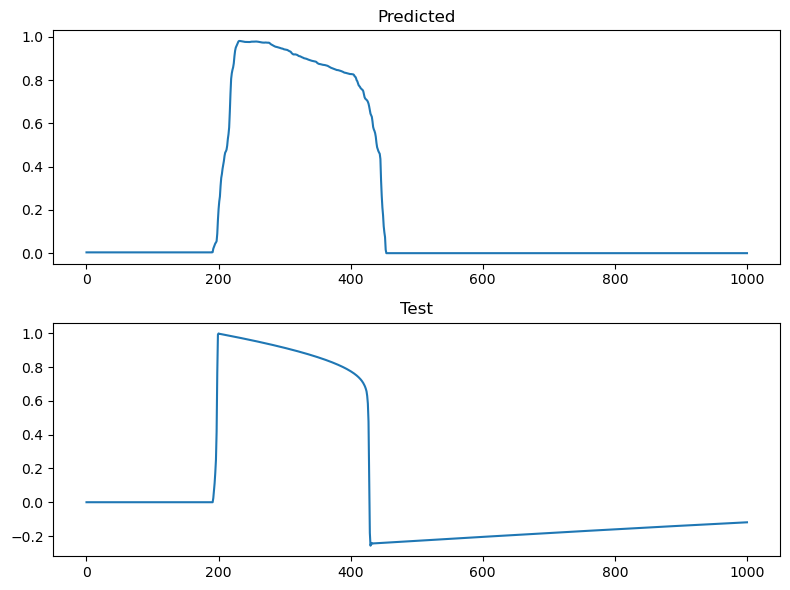

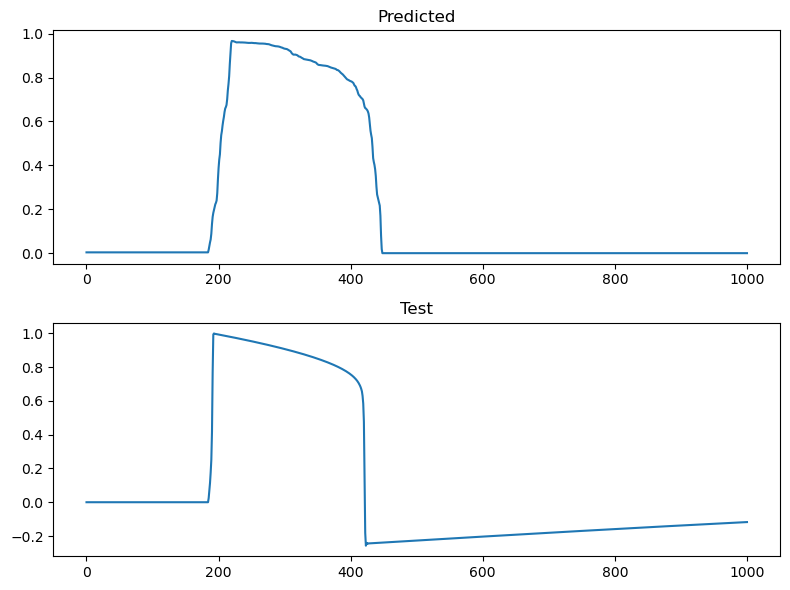

In [4]:
X_predicted = np.reshape(X_predicted,(1,1001,20,20,2))

for i in range(10):
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8, 6))

    ax1.plot(np.arange(0,np.shape(test)[1],1), X_predicted[0, :, i, i, 0])
    ax1.set_title('Predicted')

    ax2.plot(np.arange(0,np.shape(test)[1],1), test[0, :, i, i, 0])
    ax2.set_title('Test')

    plt.tight_layout()
    plt.show()

In [ ]:
dataset = np.load('../../dataset/mitch_20.npz')
data = dataset['my_data']

print(np.shape(data))

In [ ]:
latent_dim = 40
seq_length = 10
data_dir = "../../dataset/"
saving_dir = "../../models/"

Network = LED(latent_dim,data_dir,saving_dir) 

In [ ]:
input_shape_ae = np.shape(data)[-3:]
conv_ae = [(8,3),(16,3),(32,3)]
#conv_ae = [(16,3),(32,3)]
dense_ae = [75,128]
#dense_ae = [8]
Network.build_autoencoder(input_shape_ae, conv_ae, dense_ae)

In [ ]:
callbacks =  [tfk.callbacks.EarlyStopping(
                    monitor='val_loss', patience=10, restore_best_weights=True),
                tfk.callbacks.ReduceLROnPlateau(
                    monitor='val_loss', patience=5, factor=0.5, min_lr=1e-5),
            ]
aeparams = NNParams(batch_size=32, epochs=1, validation_split=0.2, callbacks=callbacks)
#Network.train_autoencoder("mitch_20.npz",aeparams,"first_test")

In [ ]:

input_shape_rnn = (seq_length,latent_dim)
dense_rnn = [64,32]
lstm_rnn = [(32,False),(16,True),(32,False)]

Network.build_RNN(input_shape_rnn, lstm_rnn, dense_rnn)

In [ ]:
Network.train_RNN("mitch_20.npz", autoencoder_name="../../models/first_test", parameters=aeparams, saving_name="first_RNN_test")